In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [2]:
# Carregar os dados do arquivo Excel
file_path = r'G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\ENERGIA_v3.xlsx'
data = pd.read_excel(file_path)

In [3]:
data

,ID_Rota,E_cinetica,E_gravit,E_atrito,E_res_ar,E_Regen_Lin,E_Regen_Exp,ENERGIA EST. (%),ENERGIA EST. REG. LIN. (%),ENERGIA EST. REG. EXP. (%),TBGREEN (%)
0,20230901_RHQ2H04,0.199537,0.098231,0.195568,0.051162,-0.040010,-0.043564,0.544498,0.504488,0.500934,0.412
1,20230902_RHS6B08,0.185326,0.111138,0.248889,0.070658,-0.043772,-0.047662,0.616011,0.572240,0.568350,0.416
2,20230902_RHS6F90,0.207013,0.219680,0.221214,0.058543,-0.045707,-0.049484,0.706450,0.660743,0.656966,0.464
3,20230902_RHT4G96,0.194500,0.101624,0.222006,0.072888,-0.043379,-0.047387,0.591018,0.547639,0.543631,0.380
4,20230904_RHQ2H05,0.258944,0.334974,0.262168,0.052849,-0.057489,-0.062224,0.908935,0.851446,0.846711,0.524
...,...,...,...,...,...,...,...,...,...,...,...
172,20240215_RHS6B06,0.166173,0.125845,0.214158,0.056880,-0.028350,-0.030652,0.563055,0.534705,0.532403,0.368
173,20240220_RHS6F91,0.166800,0.090850,0.246604,0.061937,-0.033697,-0.037042,0.566190,0.532493,0.529148,0.372
174,20240222_RHQ2H03,0.191980,0.162978,0.241654,0.072461,-0.043122,-0.047185,0.669073,0.625951,0.621888,0.532
175,20240226_RHS6F92,0.219499,0.170535,0.301118,0.068606,-0.042007,-0.045774,0.759758,0.717750,0.713983,0.444


In [4]:
X = data[['ENERGIA EST. REG. EXP. (%)']]
y = data['TBGREEN (%)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=697)

In [6]:
model = Sequential([
    Input(shape=(1,)),
    Dense(64, activation='relu'),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),                    
    Dense(1, activation='linear')                  
])

In [7]:
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

In [8]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1) 

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2405
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2371  
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2298 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2333 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2320 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2214 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2135 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1968 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2117 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2024 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2036 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1908 
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1946 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1948 
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1886 
Epoch 16/200
9/9 ━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297 
Epoch 83/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277 
Epoch 84/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0286 
Epoch 85/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0258 
Epoch 86/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0244 
Epoch 87/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231  
Epoch 88/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227  
Epoch 89/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 
Epoch 90/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0196  
Epoch 91/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 
Epoch 92/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 
Epoch 93/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180 
Epoch 94/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148 
Epoch 95/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163  
Epoch 96/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138 
Epoch 97/200
9/9 ━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032  
Epoch 164/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 
Epoch 165/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 
Epoch 166/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 
Epoch 167/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 
Epoch 168/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 
Epoch 169/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029  
Epoch 170/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 
Epoch 171/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 172/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 
Epoch 173/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 
Epoch 174/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 
Epoch 175/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 
Epoch 176/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 
Epoch 177/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 
Epoch 17

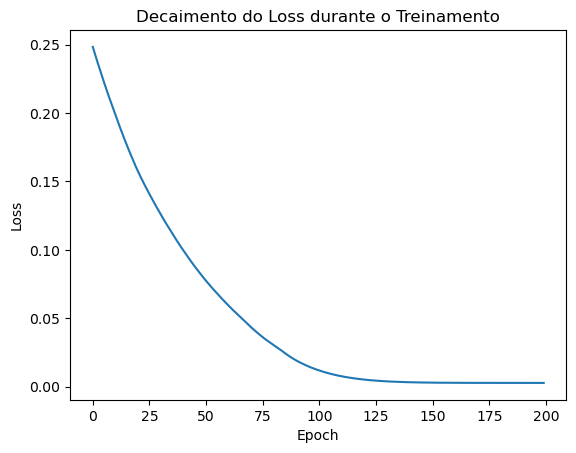

In [9]:
# Plotar o decaimento do loss ao longo das epochs
plt.plot(history.history['loss'])
plt.title('Decaimento do Loss durante o Treinamento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [10]:
loss = model.evaluate(X_test, y_test)
loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020  


0.0020408977288752794

In [11]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [12]:
predictions

array([[0.538246  ],
       [0.36445498],
       [0.43029007],
       [0.5359071 ],
       [0.43217632],
       [0.5645508 ],
       [0.42687035],
       [0.40476084],
       [0.45485345],
       [0.5788658 ],
       [0.49001718],
       [0.544542  ],
       [0.5273073 ],
       [0.50010777],
       [0.59254485],
       [0.43333536],
       [0.50423044],
       [0.53879124],
       [0.44443154],
       [0.5013644 ],
       [0.39497313],
       [0.6761132 ],
       [0.42846015],
       [0.4835791 ],
       [0.44300264],
       [0.30831695],
       [0.53503984],
       [0.39500552],
       [0.40289658],
       [0.39299613],
       [0.5488144 ],
       [0.31690225],
       [0.6402217 ],
       [0.3815952 ],
       [0.46516466],
       [0.5069778 ]], dtype=float32)

In [13]:
y_pred = pd.DataFrame(predictions)
y_test = pd.DataFrame(y_test)

In [14]:
y_pred.index = y_test.index

In [15]:
df_combined = pd.concat([y_pred,y_test], axis=1)
df_combined.columns = ['y_pred', 'y_test']

In [16]:
df_combined['dif'] = (df_combined['y_pred'] - df_combined['y_test'])*100

In [17]:
mse = mean_squared_error(df_combined['y_pred']*100, df_combined['y_test']*100)

print("Mean Squared Error (MSE) da coluna 'diferenca':", mse)

Mean Squared Error (MSE) da coluna 'diferenca': 20.40897502539888


In [18]:
df_combined

,y_pred,y_test,dif
115,0.538246,0.476,6.224598
73,0.364455,0.400,-3.554502
122,0.430290,0.432,-0.170993
50,0.535907,0.588,-5.209291
149,0.432176,0.408,2.417632
33,0.564551,0.648,-8.344918
165,0.426870,0.508,-8.112965
172,0.404761,0.368,3.676084
133,0.454853,0.444,1.085345
31,0.578866,0.608,-2.913417


In [19]:
model.save('Modelo_Energia_RNA_Simples_EXP.keras')